# Basic usage of `stoflo`: Linear reservoir model

Here we solve the simple ODE:

$$\frac{dV}{dt}=Q_i - Q_o$$

where $V$ (m$^3$) is the reservoir volume, $t$ (d) is time, and $Q_i$ (m$^3$ d$^{-1}$) and $Q_o$ (m$^3$ d$^{-1}$) are the inflow and outflow. The outflow is given by

$$Q_o=C.V$$

where $C$ (d$^{-1}$) is the discharge coefficient. 

The inflow is a defined time series (i.e. exogenous variable), which we will assume is

$$Q_i \left\{ 
\begin{array}{ll}
0.01 & t\leq 10 \\
0. & t > 10 
\end{array}
\right .$$

We will simulate the reservoir, starting empty, over 20 days, with a 0.1 d timestep.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from stoflo import model

In [2]:
# Create a model:
r=model()

In [3]:
# Add time grid information:
r.addTime(dt=0.1,tMax=20)

In [4]:
# Add stock(s):
r.addStock('V',0.)

In [5]:
# Add flow(s):
def outflowFun(stocks,pars):
    Qo=stocks['V']*pars['C']
    return Qo
r.addFlow('outflowFun',outflowFun,outfrom='V')

In [6]:
# Add driver(s):
Qi=np.zeros(r.nt)
Qi[r.t<=10]+=0.01
r.addDriver('Qi',Qi,into='V')

In [7]:
# Add parameters
pars={}
pars['C']=0.5
r.addPars(pars)

In [8]:
# Run model
r.runEuler()

In [9]:
# Calculate other model outputs:
Qo=np.zeros(r.nt)
for i in range(r.nt):
    Qo[i]=outflowFun({s: r.stocks[s][i] for s in r.stocks},pars)

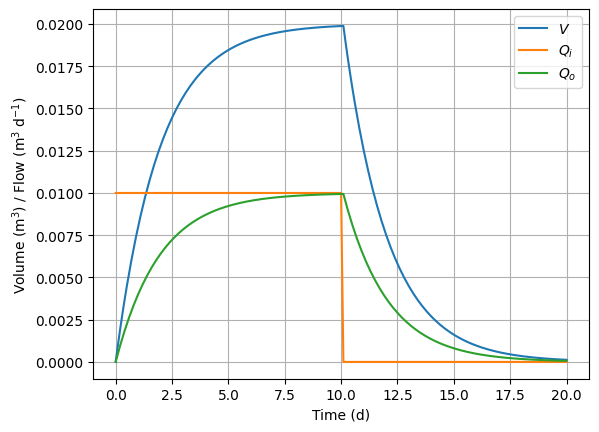

In [10]:
# Plot reservoir water balance
pl.plot(r.t,r.stocks['V'],label='$V$')
pl.plot(r.t,Qi,label='$Q_i$')
pl.plot(r.t,Qo,label='$Q_o$')
pl.ylabel('Volume (m$^3$) / Flow (m$^3$ d$^{-1}$)')
pl.xlabel('Time (d)')
pl.grid()
pl.legend()
pl.show()